<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

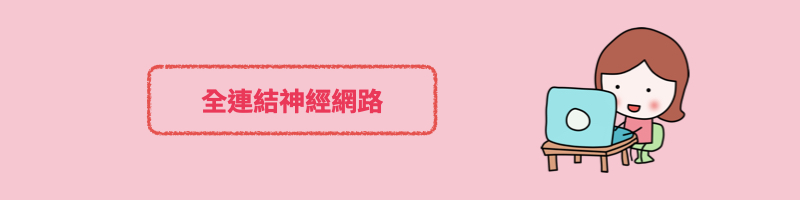

# 11.2讀入基本套件

In [666]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-04-10 06:27:28--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.153.139, 142.250.153.102, 142.250.153.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-10 06:27:28--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.31.132, 2a00:1450:4013:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  41.6MB/s    in 0.5s    

2025-04-10 06

In [667]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [668]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout


In [669]:
from tensorflow.keras.datasets import fashion_mnist #流行衣物

# 11.4切分訓練資料和測試資料

In [670]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [671]:
labels = ["T-shirt/top(T恤)", "Trouser (褲子)", "Pullover(套衫)", "Dress(裙子) ","Coat(外套)", "Sandal (涼鞋)"
,"Shirt (汗衫)", "Sneaker(運動鞋)", "Bag(包)" ,"Ankle boot(踝靴)"]


# 11.5欣賞一下資料

In [672]:
x_train.shape

(60000, 28, 28)

In [673]:
x_test.shape

(10000, 28, 28)

In [674]:
n = 9487 #隨機看一筆資料的長相
x_train[n] #讀出第 n 筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 116,  93,  96,
         96,  97,  92,  93, 138,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 115,  95,  91,
         96, 100,  96,  96, 143,  49,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 122, 111,  93,  95,
         97, 100,  97,  93, 135,  60,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 128, 108,  95,  96,
         95,  95,  93,  92, 128,  95,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  71, 130, 103,  97,  93,
         93,  91,  92,  92, 111, 138,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 120, 122, 107,  97,  92,
         97,  92,  96,  96, 111, 144,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 112, 119, 106,  99,  93,
         95,  92,  92,  96, 103, 146,  48,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 110,  97,  93,
         92,  99,  92,  95, 103, 150,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  97, 116, 116,  95,  92,
         96,  99,  92,  99, 102, 144,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  95, 116, 118, 100,  93,
         96,  92,  96, 100, 102, 136,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 112, 103,  92,
         95,  93,  97,  99,  97, 126,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 116, 115, 112, 102,
         99,  96,  99, 100,  95, 126,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 112, 114, 114, 103,
        102, 102, 102,  99,  99, 132,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 110, 116, 114, 102,
         99, 103, 103, 100, 102, 124,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 115, 112, 104,
        100,  97, 103, 107,  91, 159,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 107, 118, 108,
        102,  97, 107, 115,  92, 175,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 118, 104, 123, 107,
        106, 104, 110, 111, 100, 134,  53,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 119, 106, 124, 110,
        110, 108, 110, 110, 106, 135,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

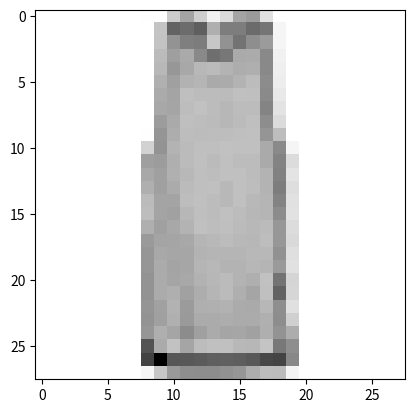

In [675]:
plt.imshow(x_train[n], cmap='Greys')

In [676]:
y_train[n] #第 n 筆資料的答案

np.uint8(0)

# 11.6打造函數學習機前的資料處理

因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [677]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [678]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [679]:
y_train.shape

(60000, 10)

In [680]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 12.1第一部曲：打造神經網路

In [681]:
model = Sequential()

In [682]:
model.add(Dense(100, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [683]:
model.add(Dense(100, activation='relu'))

In [684]:
model.add(Dense(10, activation='softmax'))

In [685]:
#model.add(Dropout(0.5))


# 12.2組裝自己的神經網路

In [686]:
# 組裝神經網路
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
              metrics=['accuracy'])

# 12.3欣賞自己的神經網路

In [687]:
# 看一下神經網路
model.summary()#(輸入*神經元)+b  784*100 +100

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

# 12.4第二部曲：訓練

In [688]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [689]:
#訓練
#model.fit(x_train, y_train, batch_size=100, epochs=20)

In [690]:
train_history =model.fit(x_train, y_train ,validation_split=0.2,epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 3s - 12ms/step - accuracy: 0.7805 - loss: 0.6300 - val_accuracy: 0.8385 - val_loss: 0.4601
Epoch 2/10
240/240 - 2s - 9ms/step - accuracy: 0.8518 - loss: 0.4200 - val_accuracy: 0.8558 - val_loss: 0.4039
Epoch 3/10
240/240 - 3s - 12ms/step - accuracy: 0.8670 - loss: 0.3730 - val_accuracy: 0.8673 - val_loss: 0.3747
Epoch 4/10
240/240 - 3s - 13ms/step - accuracy: 0.8750 - loss: 0.3452 - val_accuracy: 0.8656 - val_loss: 0.3727
Epoch 5/10
240/240 - 1s - 6ms/step - accuracy: 0.8820 - loss: 0.3236 - val_accuracy: 0.8783 - val_loss: 0.3491
Epoch 6/10
240/240 - 3s - 11ms/step - accuracy: 0.8856 - loss: 0.3104 - val_accuracy: 0.8769 - val_loss: 0.3448
Epoch 7/10
240/240 - 3s - 10ms/step - accuracy: 0.8922 - loss: 0.2952 - val_accuracy: 0.8837 - val_loss: 0.3334
Epoch 8/10
240/240 - 3s - 11ms/step - accuracy: 0.8974 - loss: 0.2799 - val_accuracy: 0.8839 - val_loss: 0.3245
Epoch 9/10
240/240 - 2s - 9ms/step - accuracy: 0.9008 - loss: 0.2703 - val_accuracy: 0.8831 - val_loss: 0.

In [691]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

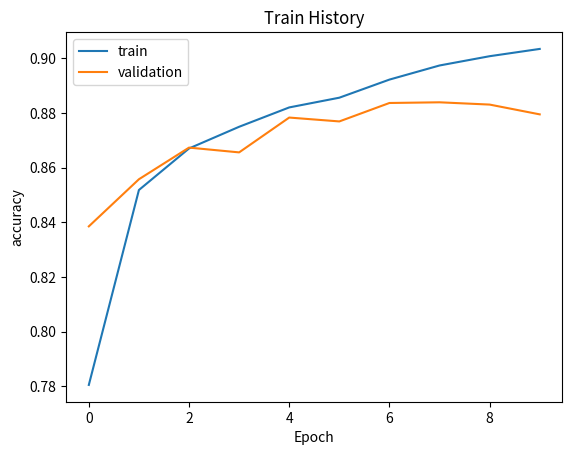

In [692]:
show_train_history(train_history,'accuracy','val_accuracy')


In [693]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# 12.5第三部曲：預測

In [694]:
x_test[5].shape

(784,)

In [695]:
inp = x_test[5].reshape(1,784)

In [696]:
model.predict(inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[3.5299814e-05, 9.9995494e-01, 2.3309309e-07, 7.2586126e-06,
        1.0093374e-06, 4.5772804e-12, 1.2996414e-06, 1.5907964e-10,
        9.0780689e-10, 1.3882630e-11]], dtype=float32)

In [697]:
np.argmax([9, 4, 6, 7])

np.int64(0)

In [698]:
np.argmax(model.predict(inp), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([1])

In [699]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [700]:
y_predict[0]

np.int64(9)

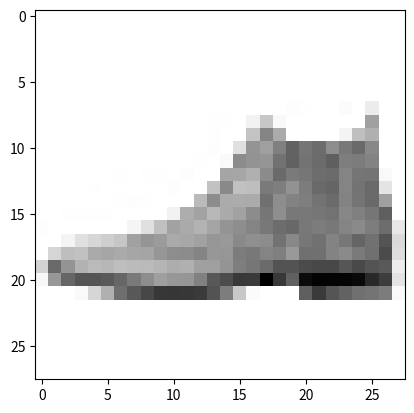

In [701]:
plt.imshow(x_test[0].reshape(28,28), cmap='Greys')

神經網路預測是： 1


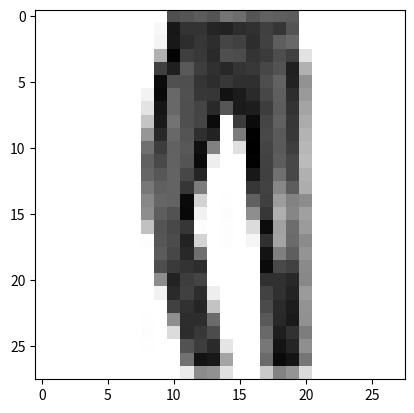

In [702]:
n = 5
print('神經網路預測是：', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 12.6更酷炫的互動呈現

In [703]:
#from ipywidgets import interact_manual

In [704]:
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys') #要將拉平的維度弄回 (28, 28)
  print('神經網路判斷為:', y_predict[測試編號])

In [705]:
#interact_manual(test, 測試編號=(0, 9999));

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [706]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3604


In [707]:
print('loss', score[0])
print('正確率', score[1])

loss 0.35694023966789246
正確率 0.8723999857902527


# 12.7儲存我們完整模型

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [708]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [709]:
%cd '/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi'

/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi


In [710]:
model.save('my_dnn_model.keras')

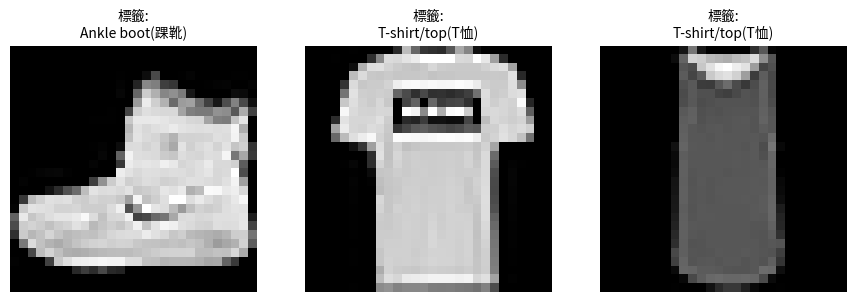

In [711]:
import matplotlib.pyplot as plt
import numpy as np



# 顯示三張訓練圖片與其對應標籤
plt.figure(figsize=(9, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("標籤:\n" + labels[np.argmax(y_train[i])], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

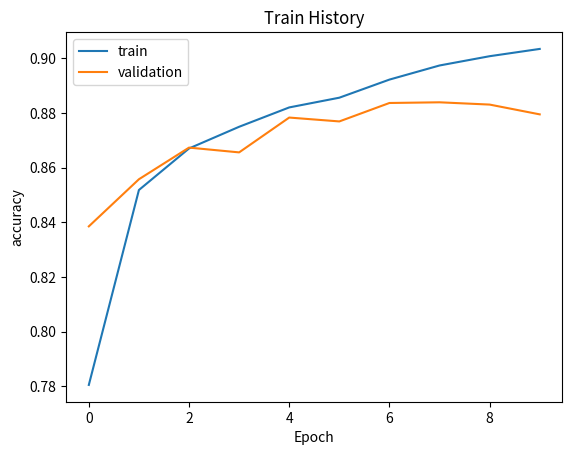

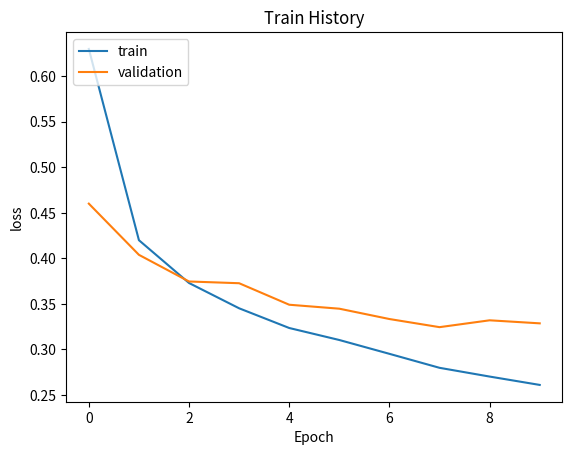

In [712]:
# 繪製 Accuracy 圖
show_train_history(train_history, 'accuracy', 'val_accuracy')
# 繪製 Loss 圖
show_train_history(train_history, 'loss', 'val_loss')

In [713]:
# 用測試資料評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3604
Test Accuracy: 87.24%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


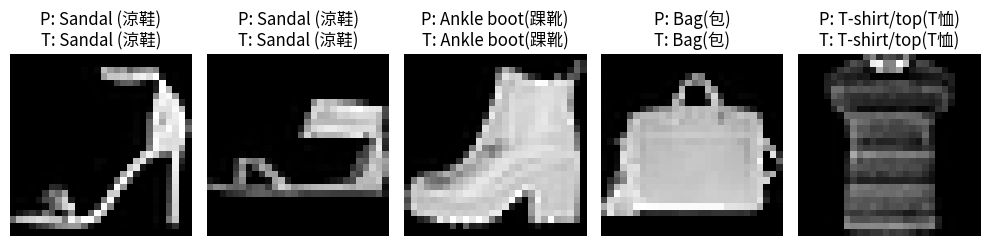

In [714]:

# 預測
predictions = model.predict(x_test)
import random

plt.figure(figsize=(10,4))
for i in range(5):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    pred_label = labels[np.argmax(predictions[idx])]
    true_label = labels[np.argmax(y_test[idx])]
    plt.title(f"P: {pred_label}\nT: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

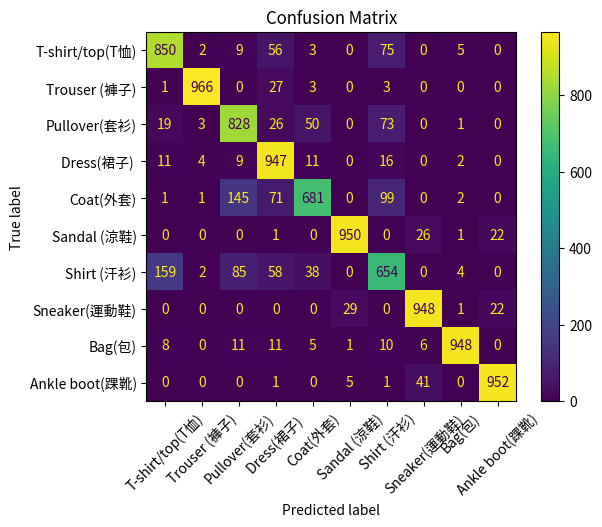

In [715]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [716]:
# 儲存完整模型
model.save("fashion_dnn_model.h5")
print("模型已儲存為 fashion_dnn_model.h5")

模型已儲存為 fashion_dnn_model.h5
